In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Bank Customer Churn Prediction.csv", index_col="customer_id")
one_hot_country = pd.get_dummies(df.country, prefix='country')
one_hot_gender = pd.get_dummies(df.gender, prefix='gender')
df = df.drop(["country","gender"],axis=1)
df = pd.concat([df, one_hot_country, one_hot_gender], axis=1)
y = df["churn"]
X = df.drop("churn", axis=1)
X

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_France,country_Germany,country_Spain,gender_Female,gender_Male
customer_id,,,,,,,,,,,,,
15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
15701354,699,39,1,0.00,2,0,0,93826.63,1,0,0,1,0
15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15606229,771,39,5,0.00,2,1,0,96270.64,1,0,0,0,1
15569892,516,35,10,57369.61,1,1,1,101699.77,1,0,0,0,1
15584532,709,36,7,0.00,1,0,1,42085.58,1,0,0,1,0


              precision    recall  f1-score   support

           0       0.87      0.96      0.92      1596
           1       0.76      0.45      0.56       404

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



<Figure size 2000x2000 with 0 Axes>

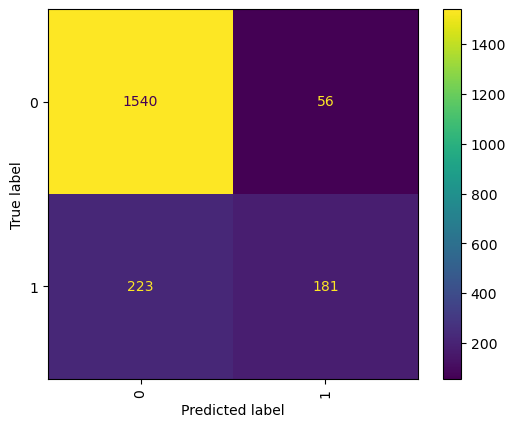

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MLPClassifier(early_stopping=True, solver='adam')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(x) for x in sorted(y.unique())])
plt.figure(figsize = (20, 20))
disp.plot(xticks_rotation='vertical')
plt.show()


In [6]:
df1 = df.loc[df['churn']==1,:].sample(8000,replace=True)
df0 = df.loc[df['churn']==0,:]
print(df1.shape)
print(df0.shape)

(8000, 14)
(7963, 14)


In [7]:
df = pd.concat([df0,df1])
y = df["churn"]
X = df.drop("churn", axis=1)

              precision    recall  f1-score   support

           0       0.81      0.77      0.79      1606
           1       0.77      0.82      0.79      1587

    accuracy                           0.79      3193
   macro avg       0.79      0.79      0.79      3193
weighted avg       0.79      0.79      0.79      3193



<Figure size 2000x2000 with 0 Axes>

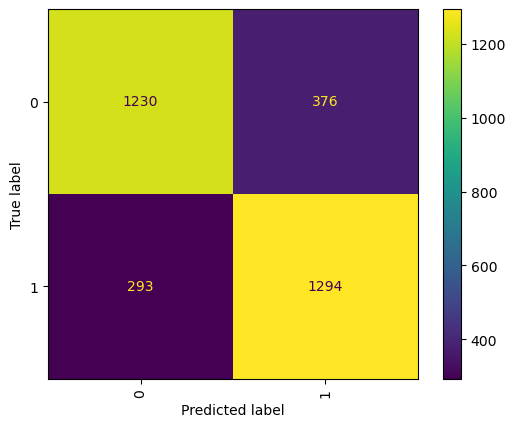

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = MLPClassifier(early_stopping=True, solver='adam')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(x) for x in sorted(y.unique())])
plt.figure(figsize = (20, 20))
disp.plot(xticks_rotation='vertical')
plt.show()

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import EarlyStopping

In [11]:
model = Sequential()
model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')


Epoch 1/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.4105 - val_loss: 0.4482
Epoch 2/30
320/320 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.4192 - val_loss: 0.4564
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
              precision    recall  f1-score   support

           0       0.81      0.72      0.76      1606
           1       0.75      0.83      0.79      1587

    accuracy                           0.78      3193
   macro avg       0.78      0.78      0.78      3193
weighted avg       0.78      0.78      0.78      3193



<Figure size 2000x2000 with 0 Axes>

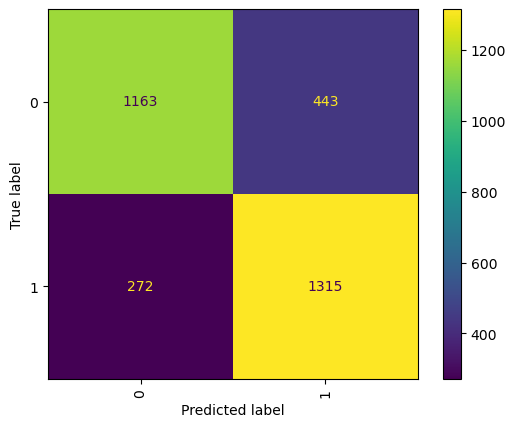

In [13]:
es = EarlyStopping(monitor='val_loss', patience=1)
model.fit(X_train, y_train, epochs=30, validation_split=0.2, callbacks=[es])

y_pred = model.predict(X_test)
y_pred[y_pred >= 0.5] = 1
y_pred[y_pred < 0.5] = 0

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(x) for x in sorted(y.unique())])
plt.figure(figsize = (20, 20))
disp.plot(xticks_rotation='vertical')
plt.show()

# Try another example (multiclass)

In [14]:
# Let's try wine example with keras

df = pd.read_csv('wine.csv',)
X = df.drop(['Class'],axis='columns')
y = df['Class'] - 1

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [16]:
y

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: Class, Length: 178, dtype: int64

In [17]:
model = Sequential()
model.add(Dense(X_train.shape[1], activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# https://datascience.stackexchange.com/questions/41921/sparse-categorical-crossentropy-vs-categorical-crossentropy-keras-accuracy/55987#55987

In [18]:
es = EarlyStopping(monitor='val_loss', patience=10)
model.fit(X_train, y_train, epochs=50, validation_split=0.2, callbacks=[es])

y_pred = model.predict(X_test)
y_pred

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - accuracy: 0.4318 - loss: 1.0933 - val_accuracy: 0.5200 - val_loss: 1.0904
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7031 - loss: 0.9865 - val_accuracy: 0.5600 - val_loss: 1.0297
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6693 - loss: 0.9485 - val_accuracy: 0.5600 - val_loss: 0.9716
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.7293 - loss: 0.8877 - val_accuracy: 0.6000 - val_loss: 0.9199
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.7490 - loss: 0.8156 - val_accuracy: 0.6000 - val_loss: 0.8696
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.7511 - loss: 0.7670 - val_accuracy: 0.7200 - val_loss: 0.8184
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.8024 - loss: 0.7133 - val_accuracy: 0.8000 - val_loss: 0.7641
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8610 - loss: 0.6713 - val_accuracy: 0.8400 - val_loss: 0.7111


array([[1.73016218e-03, 9.96252358e-01, 2.01756181e-03],
       [9.95752454e-01, 1.42159034e-03, 2.82598380e-03],
       [1.02980972e-04, 9.99438584e-01, 4.58382769e-04],
       [9.96415734e-01, 1.32754864e-03, 2.25670752e-03],
       [9.54344094e-01, 3.87714095e-02, 6.88450364e-03],
       [1.02551552e-02, 1.14065975e-01, 8.75678778e-01],
       [2.13170517e-03, 2.97247129e-03, 9.94895756e-01],
       [9.47171867e-01, 3.97420637e-02, 1.30860116e-02],
       [5.26367463e-02, 8.81089091e-01, 6.62741736e-02],
       [9.86886442e-01, 5.96072711e-03, 7.15281721e-03],
       [8.92278797e-04, 6.41809916e-03, 9.92689669e-01],
       [1.39800524e-02, 9.56489623e-01, 2.95303017e-02],
       [6.50152870e-05, 9.99748409e-01, 1.86581383e-04],
       [2.65820621e-04, 9.98894393e-01, 8.39859946e-04],
       [6.81910396e-01, 2.42973164e-01, 7.51164109e-02],
       [8.29127035e-04, 2.45414395e-03, 9.96716678e-01],
       [9.99750555e-01, 5.61761954e-05, 1.93334650e-04],
       [1.02520185e-02, 7.46172

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        15

    accuracy                           1.00        54
   macro avg       1.00      1.00      1.00        54
weighted avg       1.00      1.00      1.00        54



<Figure size 2000x2000 with 0 Axes>

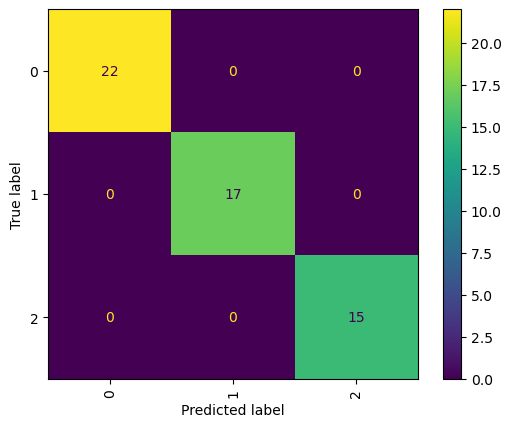

In [19]:
y_pred = [np.argmax(p) for p in y_pred]


print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(x) for x in sorted(y.unique())])
plt.figure(figsize = (20, 20))
disp.plot(xticks_rotation='vertical')
plt.show()